In [1]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("agungpambudi/network-malware-detection-connection-analysis")

print("Path to dataset files:", path)

RELOAD_DATA = False
if not RELOAD_DATA:
  try:
    print(df)
  except Exception as e:
    print("No dataframe.  Loading data...")
    RELOAD_DATA=True
if RELOAD_DATA:
  dataframes = []
  import os
  for dirname, _, filenames in os.walk(path):
    for index, filename in enumerate(filenames):
      full_path = os.path.join(dirname, filename)
      print(f"Using file: {full_path}")
      dataframes.append(pd.read_csv(full_path, sep ="|"))
  df = pd.concat(dataframes, ignore_index=True)


Path to dataset files: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3
No dataframe.  Loading data...
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-ana

/tmp/ipykernel_26043/1690238193.py:23: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(full_path, sep ="|"))


Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-8-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-44-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connection-analysis/versions/3/CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv
Using file: /home/craig-wilkinson/.cache/kagglehub/datasets/agungpambudi/network-malware-detection-connectio

In [2]:
print(len(df))

25011003


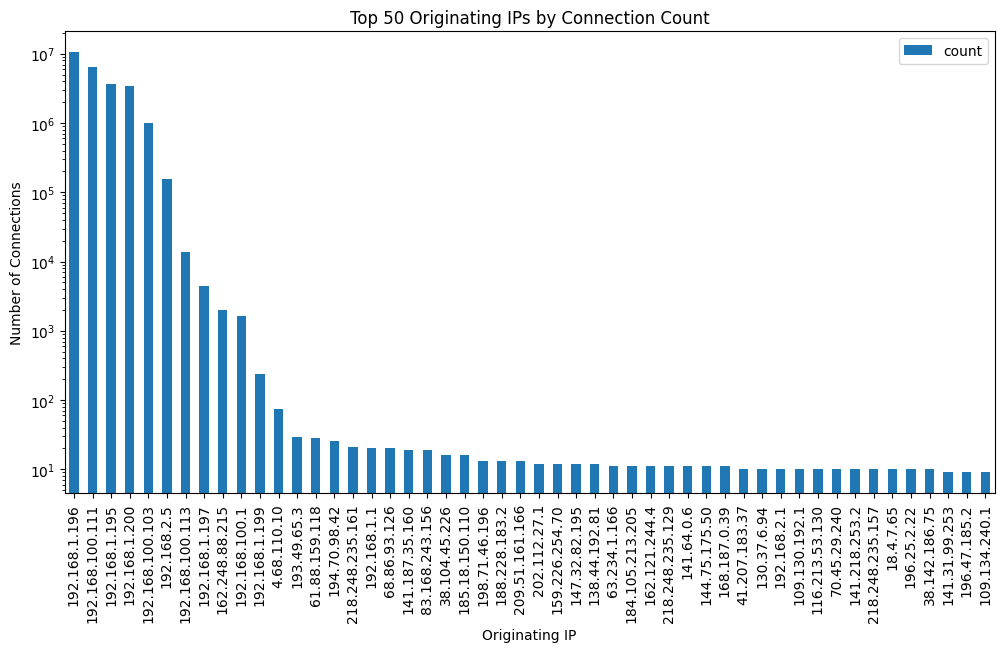

In [3]:
count_org_ip = df.groupby("id.orig_h").size().reset_index(name='count')

count_org_ip = count_org_ip.sort_values(by='count', ascending=False)
top50 = count_org_ip.head(50)

import matplotlib.pyplot as plt

ax = top50.plot.bar(x="id.orig_h", y="count", figsize=(12,6), rot=90)
ax.set_xlabel("Originating IP")
ax.set_ylabel("Number of Connections")
ax.set_title("Top 50 Originating IPs by Connection Count")
ax.set_yscale('log')

plt.show()

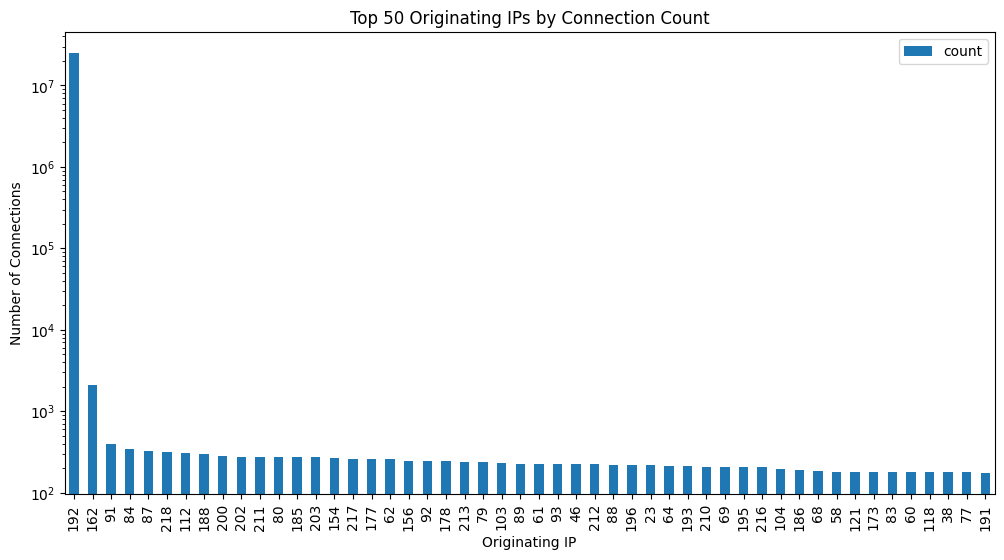

In [4]:
count_org_ip = df.groupby(df["id.orig_h"].str.split('.').str[0]).size().reset_index(name='count')
count_org_ip = count_org_ip.sort_values(by='count', ascending=False)
top50 = count_org_ip.head(50)

import matplotlib.pyplot as plt

ax = top50.plot.bar(x="id.orig_h", y="count", figsize=(12,6), rot=90)
ax.set_xlabel("Originating IP")
ax.set_ylabel("Number of Connections")
ax.set_title("Top 50 Originating IPs by Connection Count")
ax.set_yscale('log')

plt.show()

In [5]:
count_192_row = count_org_ip[count_org_ip['id.orig_h'] == '192']

# Print the 'count' value from that row
# We use .iloc[0] to get the first (and only) row
home_network_count = count_192_row.iloc[0]['count']
total_sum = count_org_ip['count'].sum()
print(f"Percent orig IP is 192.?: {home_network_count / total_sum}")

Percent orig IP is 192.?: 0.998970453124171


label
Benign                                   8780158
Malicious                                7055007
Malicious   DDoS                         5778154
Malicious   PartOfAHorizontalPortScan    3386241
Malicious   C&C                             8685
Malicious   Attack                          2755
Malicious   FileDownload                       3
Name: count, dtype: int64


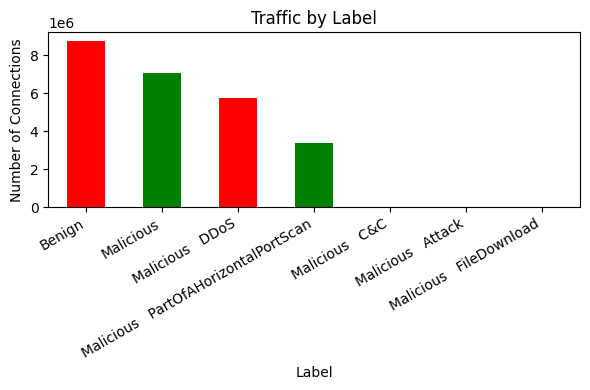

In [6]:
label_counts = df['label'].value_counts()
print(label_counts)

# Plot
import matplotlib.pyplot as plt

label_counts.plot.bar(figsize=(6,4), rot=0, color=['red','green'])
plt.xlabel('Label')
plt.ylabel('Number of Connections')
plt.title('Traffic by Label')

plt.xticks(rotation=30, ha='right')
plt.tight_layout() # Adjusts plot parameters for a tight layout

plt.show()

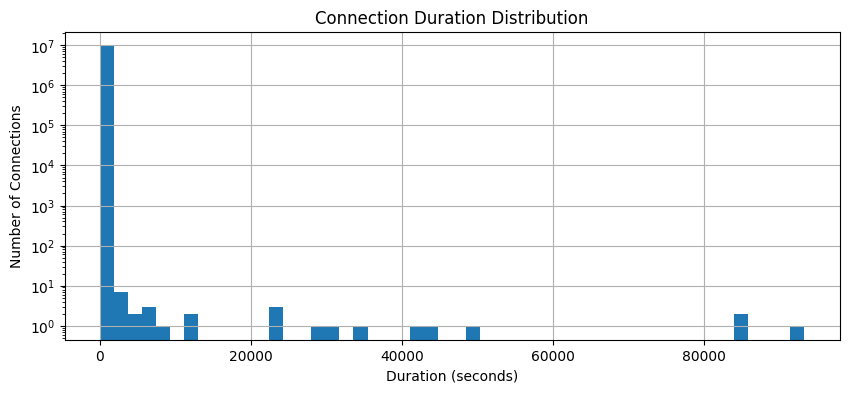

In [7]:
# Convert '-' or missing values to NaN first
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

df['duration'].hist(bins=50, figsize=(10,4))
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Connections')
plt.title('Connection Duration Distribution')
plt.yscale('log')
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Convert columns to numeric, coerce errors (replace '-' with NaN)
numeric_cols = ['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'resp_pkts', 'id.orig_p', 'id.resp_p']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
from sklearn.preprocessing import StandardScaler
# Fill NaNs with 0 (or median)
df[numeric_cols] = df[numeric_cols].fillna(0)
# Encode protocol
df['proto_code'] = df['proto'].map({'tcp': 0, 'udp': 1, 'icmp': 2}).fillna(-1)


features = ['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'resp_pkts', 'id.orig_p', 'id.resp_p', 'proto_code']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

{28: defaultdict(<class 'int'>, {'Benign': 210585, 'Malicious   DDoS': 9, 'Malicious': 34, 'Malicious   PartOfAHorizontalPortScan': 1}), 33: defaultdict(<class 'int'>, {'Benign': 21622}), 30: defaultdict(<class 'int'>, {'Malicious   C&C': 277, 'Malicious': 505132, 'Benign': 1229389, 'Malicious   PartOfAHorizontalPortScan': 501633, 'Malicious   Attack': 386, 'Malicious   DDoS': 135686}), 49: defaultdict(<class 'int'>, {'Benign': 1185493, 'Malicious': 505072, 'Malicious   PartOfAHorizontalPortScan': 485262, 'Malicious   Attack': 390, 'Malicious   C&C': 426, 'Malicious   DDoS': 139068}), 29: defaultdict(<class 'int'>, {'Malicious   C&C': 1}), 18: defaultdict(<class 'int'>, {'Benign': 25116}), 41: defaultdict(<class 'int'>, {'Malicious   C&C': 1}), 14: defaultdict(<class 'int'>, {'Malicious   C&C': 1}), 47: defaultdict(<class 'int'>, {'Malicious': 6309, 'Malicious   DDoS': 506333, 'Benign': 7428, 'Malicious   PartOfAHorizontalPortScan': 10}), 25: defaultdict(<class 'int'>, {'Malicious': 10

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
from scipy import stats

# Choose number of clusters (k)
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_to_label_counts = {}
for label, cluster in zip(df['label'], df['cluster']):
  if cluster not in cluster_to_label_counts:
    cluster_to_label_counts[cluster] = defaultdict(int)

  cluster_to_label_counts[cluster][label] += 1

print(cluster_to_label_counts)
for cluster, counts in cluster_to_label_counts.items():
    print(f"Cluster: {cluster} - {counts}")
centers = kmeans.cluster_centers_

feature_names = X.columns

robust_spread = stats.median_abs_deviation(centers, axis=0, scale=1)

# If you strictly need "variance" units (squared), square it:
robust_variance = robust_spread ** 2
# feature_variance = np.var(centers, axis=0)

# Create a Series to see the most "important" features
importance_series = pd.Series(robust_variance, index=feature_names)

# Sort to see the features that vary the most
print("Features with most variance across clusters (most 'important'):")
print(importance_series.sort_values(ascending=False))
print(features)

{28: defaultdict(<class 'int'>, {'Benign': 210585, 'Malicious   DDoS': 9, 'Malicious': 34, 'Malicious   PartOfAHorizontalPortScan': 1}), 33: defaultdict(<class 'int'>, {'Benign': 21622}), 30: defaultdict(<class 'int'>, {'Malicious   C&C': 277, 'Malicious': 505132, 'Benign': 1229389, 'Malicious   PartOfAHorizontalPortScan': 501633, 'Malicious   Attack': 386, 'Malicious   DDoS': 135686}), 49: defaultdict(<class 'int'>, {'Benign': 1185493, 'Malicious': 505072, 'Malicious   PartOfAHorizontalPortScan': 485262, 'Malicious   Attack': 390, 'Malicious   C&C': 426, 'Malicious   DDoS': 139068}), 29: defaultdict(<class 'int'>, {'Malicious   C&C': 1}), 18: defaultdict(<class 'int'>, {'Benign': 25116}), 41: defaultdict(<class 'int'>, {'Malicious   C&C': 1}), 14: defaultdict(<class 'int'>, {'Malicious   C&C': 1}), 47: defaultdict(<class 'int'>, {'Malicious': 6309, 'Malicious   DDoS': 506333, 'Benign': 7428, 'Malicious   PartOfAHorizontalPortScan': 10}), 25: defaultdict(<class 'int'>, {'Malicious': 10

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [11]:
import plotly.express as px

sampled_df = df.sample(n=200_000, random_state=42)

fig = px.scatter_3d(sampled_df, 
                    x='resp_bytes', 
                    y='orig_pkts', 
                    z='duration',
                    color='label',
                    title='Interactive 3D Scatter Plot')

fig.update_layout(scene=dict(
    xaxis=dict(title='resp_bytes (log)', type='log'),
    yaxis=dict(title='orig_pkts (log)', type='log'),
    zaxis=dict(title='duration (log)', type='log')
))

fig.update_traces(marker_size=2)
fig.show()

In [12]:

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

#df = pd.get_dummies(df, columns=['label'])
sampled_df = df.sample(n=1_000_000, random_state=42)

X = sampled_df[features]

y = sampled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)



LogisticRegression(max_iter=300)

Model Accuracy: 0.484622

Confusion Matrix:
[[168781      8      0    286   6249    110]
 [140578    150      0      0    661      0]
 [    59      0      0      0      0      0]
 [   176      0      0      2      2      0]
 [ 41952      0      0      1  73378      0]
 [ 67604      0      0      0      3      0]]


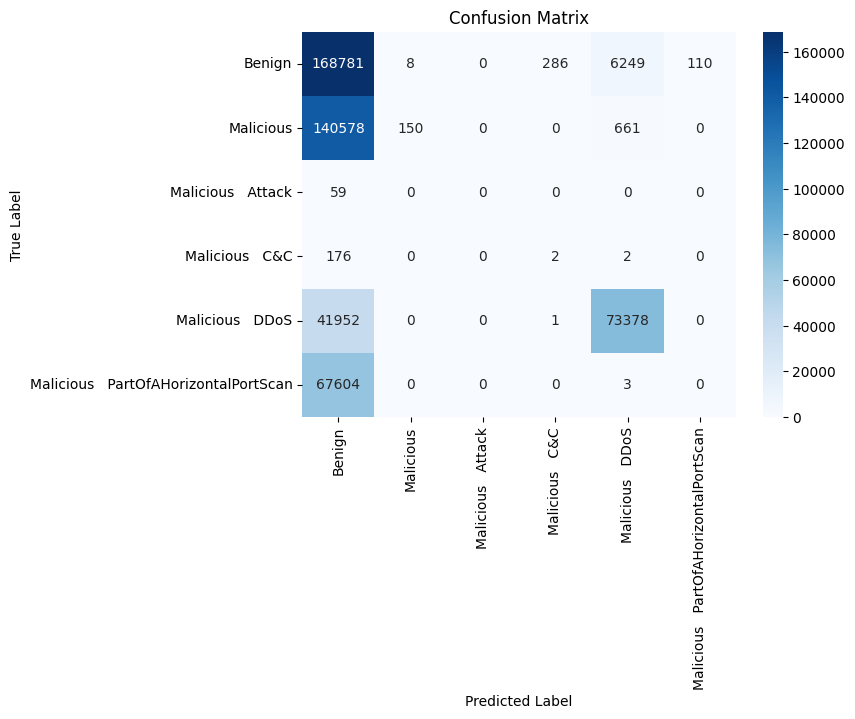

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 2. (Optional) Visualize the confusion matrix for better interpretation
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()